# Задача классификации. Дерево решений



In [2]:
import pandas as pd
import seaborn as sns
from sklearn import tree

In [5]:
df=pd.read_csv('https://github.com/Vitalyastiy/courses/blob/main/stepic_ML/students.csv?raw=true', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [8]:
df_cut=df[[ 'Hair length','Shoe size','Sex']]
df_cut=df_cut.dropna()

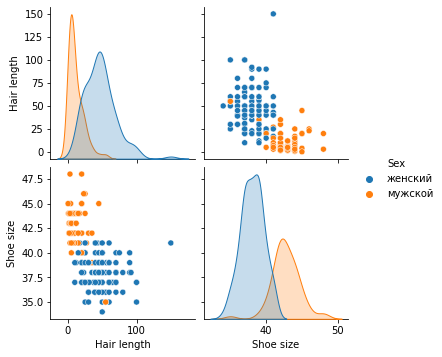

In [9]:
sns.pairplot(df_cut, hue='Sex')

Гипотеза: угадать пол человека можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

In [10]:
model=tree.DecisionTreeClassifier(max_depth=2)
model.fit(df_cut[[ 'Hair length','Shoe size']].values.reshape(-1,2), y=df_cut['Sex'].values)

DecisionTreeClassifier(max_depth=2)

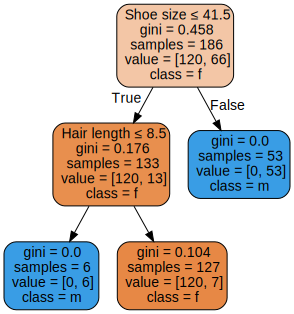

In [17]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=[ 'Hair length','Shoe size'],  
                      class_names=['f', 'm'],  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

[Text(0.6, 0.8333333333333334, 'X[1] <= 41.5\ngini = 0.458\nsamples = 186\nvalue = [120, 66]'),
 Text(0.4, 0.5, 'X[0] <= 8.5\ngini = 0.176\nsamples = 133\nvalue = [120, 13]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.104\nsamples = 127\nvalue = [120, 7]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]')]

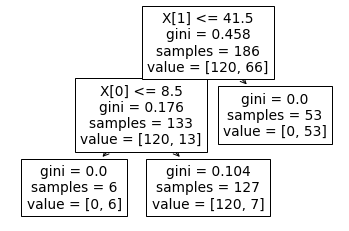

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree



model_dtc = DecisionTreeClassifier(max_depth=2)
model_dtc.fit(df[['Hair length', 'Shoe size']], df['Sex'])

plot_tree(model_dtc)

Загружаем тестовую выбоку

In [19]:
df_test=pd.read_csv('https://github.com/Vitalyastiy/courses/blob/main/stepic_ML/students_test.csv?raw=true', delimiter=',')
df_test_cut=df_test[['Hair length', 'Shoe size','Sex']]
df_test_cut=df_test_cut.dropna()

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [21]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Hair length', 'Shoe size']].values.reshape(-1,2))

Метрики качества задачи классификации

In [28]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,61,2
мужской,1,34


Так считаются метрики качества в задаче классификации

Есть два показателя: precision и recall. Их можно подсчитать для каждого класса.

**recall(для женщин)=доля правильно предсказанных женщин среди среди всех женщин**

В нашем примере: recall(для женщин)=40/(40+2)=0.9523809523809523

**recall(для мужчин)=доля правильно предсказанных мужчин среди среди всех мужчин**

В нашем примере: recall(для мужчин)=25/(25+1)=0.9615384615384616

**precision(для женщин)=доля истинных женщин среди людей, отнесенных ИИ к женщинам**

В нашем примере: precision(для женщин)=40/(40+1)=0.975609756097561

**precision(для мужчин)=доля истинных мужчин среди людей, отнесенных ИИ к мужчинам**

В нашем примере: precision(для мужчин)=25/(25+2)=0.9259259259259259



In [29]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([0.96825397, 0.97142857]),
 array([0.98387097, 0.94444444]),
 array([0.976     , 0.95774648]),
 array([62, 36]))

In [ ]:
df_cut=df[['Hair length','Shoe size','Sex']]


In [ ]:
model=tree.DecisionTreeClassifier()
model.fit(df_cut[['Hair length','Shoe size']].values.reshape(-1,2), y=df_cut['Sex'].values)

DecisionTreeClassifier()

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['Hair length','Shoe size'],  
                      class_names=['f', 'm'],  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students_test.csv', delimiter=',')
df_test_cut=df_test[['Hair length','Shoe size','Sex']]
df_test_cut=df_test_cut.dropna()

In [ ]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Hair length','Shoe size']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,59,1
мужской,3,35


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([0.98333333, 0.92105263]),
 array([0.9516129 , 0.97222222]),
 array([0.96721311, 0.94594595]),
 array([62, 36]))